In [1]:
from google.colab import drive
drive.mount('/content/ddrive')

Mounted at /content/ddrive


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
cd /content/ddrive/MyDrive/Basic_DeepLearning/Raw Algotithms Implementation /Logistic Regression

/content/ddrive/MyDrive/Basic_DeepLearning/Raw Algotithms Implementation /Logistic Regression


In [3]:
def sigmoid_func(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def predict(features, weights):
    return sigmoid_func(np.dot(features, weights))

In [5]:
def cost_func(features, weights, labels, num):
    preds = predict(features, weights)
    cost = - np.sum(labels * np.log(preds) + (1 - labels) * np.log(1 - preds))
    return cost / num

In [6]:
def weights_update(features, weights, labels, learning_rate, num):
    preds = predict(features, weights)
    cost_der = np.dot(features.T, preds - labels) / num
    weights -= learning_rate*cost_der
    return weights

In [7]:
def training(features, weights, labels, learning_rate, num, epoches):
    cost_his = []
    for i in range(epoches):
        weights = weights_update(features, weights, labels, learning_rate, num)
        cost = cost_func(features, weights, labels, num)
        cost_his.append(cost)
    return weights, cost_his

In [28]:
df = pd.read_csv("data_classification.csv", header = None)
df.head()

,0,1,2
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


### ***Prepare data***

In [50]:
new_df = df.to_numpy()
num, num_class = df.shape
feature = new_df[:, :-1]
features = np.hstack((feature, np.ones((num, 1))))
labels = new_df[:, -1].reshape(-1, 1)

In [80]:
accept = []
decline = []
for item in df.values:
    if item[2] == 1:
        accept.append(list(item[:-1]))
    else:
        decline.append(list(item[:-1]))
accept = np.asarray(accept)
decline = np.asarray(decline)

[[  1.31358282]
 [  1.09524214]
 [-12.00763683]]


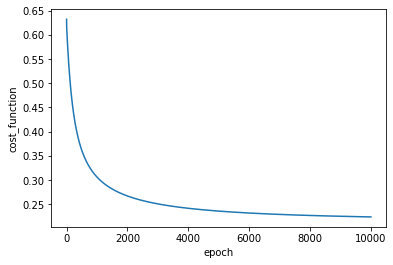

In [81]:
weights = np.zeros((num_class, 1))
weights, cost = training(features, weights, labels, 0.095, num, 10000)
print(weights)
plt.plot(cost);
plt.xlabel('epoch')
plt.ylabel('cost_function');

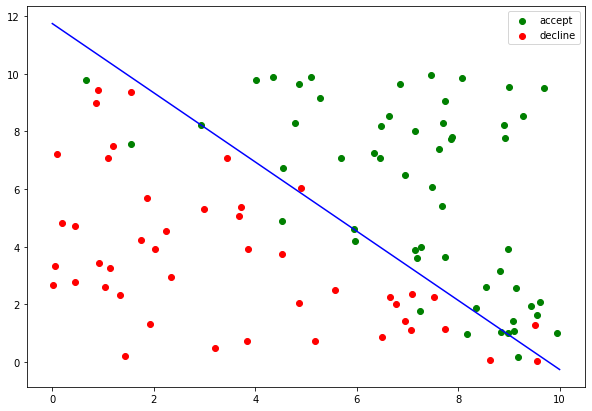

In [83]:
plt.figure(figsize = (10, 7))
plt.scatter(accept[:, 0], accept[:, 1], c ='g', label = 'accept')
plt.scatter(decline[:, 0], decline[:, 1], c = 'r', label = 'decline')
plt.legend()
plt.plot((0, 10), (-(weights[0] * 0 + weights[2] + np.log(1.0/t - 1)) / weights[1], -(weights[0]*10 + weights[2] + np.log(1.0/t - 1)) / weights[1]), c = 'b');